In [1]:
import numpy as np
import pandas as pd

## Reading Data

In [3]:
df = pd.read_csv("data.csv")

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [5]:
df.shape

(2742596, 10)

In [13]:
df.isnull().sum()
print(2742596-547644)

2194952


In [26]:
df["test_indication"].value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: test_indication, dtype: int64

## Filtering Data 

In [15]:
df.drop(['test_date'], axis=1, inplace=True)

In [16]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,negative,NaN,female,Other
2742592,0,0,0,0,0,negative,NaN,female,Other
2742593,0,0,0,0,0,other,NaN,male,Other
2742594,0,0,0,0,0,negative,NaN,female,Other


In [22]:
df = df.dropna()
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [51]:
df = df.reindex(columns = ['cough','fever','sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'corona_result'])
df_filtered = df[df['corona_result'] != "other"]

In [52]:
df = df_filtered
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
2731639,1,1,1,1,1,0,1,2,1
2731640,0,0,0,0,0,0,1,1,0
2731643,1,0,0,0,0,0,0,2,0
2731644,0,0,0,0,0,0,1,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151898 entries, 0 to 2731647
Data columns (total 9 columns):
 #   Column               Dtype
---  ------               -----
 0   cough                int64
 1   fever                int64
 2   sore_throat          int64
 3   shortness_of_breath  int64
 4   head_ache            int64
 5   age_60_and_above     int32
 6   gender               int32
 7   test_indication      int32
 8   corona_result        int32
dtypes: int32(4), int64(5)
memory usage: 131.3 MB


In [66]:
# Replacing positivie with 1 and negative with 0
df.loc[(df.corona_result == "negative"), 'corona_result'] = int(0)
df.loc[(df.corona_result == "positive"), 'corona_result'] = int(1)
df.loc[(df.age_60_and_above == "No"), 'age_60_and_above'] = int(0)
df.loc[(df.age_60_and_above == "Yes"), 'age_60_and_above'] = int(1)
df.loc[(df.test_indication == "Other"), 'test_indication'] = int(1)
df.loc[(df.test_indication == "Contact with confirmed"), 'test_indication'] = int(2)
df.loc[(df.test_indication == "Abroad"), 'test_indication'] = int(3)
df.loc[(df.gender == "male"), 'gender'] = int(0)
df.loc[(df.gender == "female"), 'gender'] = int(1)
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
2731639,1,1,1,1,1,0,1,2,1
2731640,0,0,0,0,0,0,1,1,0
2731643,1,0,0,0,0,0,0,2,0
2731644,0,0,0,0,0,0,1,1,0


In [64]:
df["corona_result"] = df["corona_result"].astype(str).astype(int)
df["age_60_and_above"] = df["age_60_and_above"].astype(str).astype(int)
df["test_indication"] = df["test_indication"].astype(str).astype(int)
df["gender"] = df["gender"].astype(str).astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151898 entries, 0 to 2731647
Data columns (total 9 columns):
 #   Column               Dtype
---  ------               -----
 0   cough                int64
 1   fever                int64
 2   sore_throat          int64
 3   shortness_of_breath  int64
 4   head_ache            int64
 5   age_60_and_above     int32
 6   gender               int32
 7   test_indication      int32
 8   corona_result        int32
dtypes: int32(4), int64(5)
memory usage: 131.3 MB


In [68]:
df['shortness_of_breath'].value_counts()

0    2142863
1       9035
Name: shortness_of_breath, dtype: int64

In [69]:
pd.set_option('display.float_format', '{:.6f}'.format)
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
count,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000
mean,0.040528,0.036959,0.012098,0.004199,0.024427,0.131042,0.514167,1.083400,0.096996
std,0.197195,0.188661,0.109324,0.064661,0.154372,0.337447,0.499799,0.301923,0.295953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


## Train Test Splitting

In [130]:
import numpy as np

In [131]:
def data_split(data, ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [149]:
train, test = data_split(df, 0.2)

In [152]:
# Train Data
train

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
109678,0,0,0,0,0,0,1,1,0
935943,0,0,0,0,0,0,0,1,0
542048,0,0,0,0,0,1,1,1,1
1787545,0,0,0,0,0,0,0,1,0
1320871,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2540654,0,0,0,0,0,0,0,1,0
1665693,0,0,0,0,0,0,1,1,0
792406,0,0,0,0,0,0,1,1,0
119213,0,0,0,0,0,0,1,1,0


In [153]:
# Test Data
test

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
375107,0,0,0,0,0,0,1,1,0
1033608,0,0,0,0,0,0,1,1,0
1269326,1,0,0,0,0,0,1,2,0
4988,0,0,0,0,0,0,1,1,0
1011464,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1037463,0,0,0,0,0,0,0,1,0
2704561,1,1,0,0,0,0,0,3,1
113468,0,0,0,0,0,0,1,1,0
1436181,0,0,0,0,0,0,1,1,0


In [154]:
X_train = train[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication']]
X_test = test[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication']].to_numpy()

In [155]:
Y_train = train['corona_result'].to_numpy().reshape(1721519,)
Y_test = test['corona_result'].to_numpy().reshape(430379,)

In [156]:
X_train

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
109678,0,0,0,0,0,0,1,1
935943,0,0,0,0,0,0,0,1
542048,0,0,0,0,0,1,1,1
1787545,0,0,0,0,0,0,0,1
1320871,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2540654,0,0,0,0,0,0,0,1
1665693,0,0,0,0,0,0,1,1
792406,0,0,0,0,0,0,1,1
119213,0,0,0,0,0,0,1,1


In [157]:
# Converts to numpy array
X_train.to_numpy()

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [158]:
X_test

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 2],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [159]:
Y_train

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
Y_test

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
clf = LogisticRegression()

clf.fit(X_train, Y_train)

LogisticRegression()

In [163]:
# Predicting the test set results and calculating the accuracy
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [164]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[381922   6860]
 [ 30272  11325]]


## The result is telling us that we have 381922 + 11325 correct predictions and 30272 + 6860 incorrect predictions.

##    Receiver operating characteristic (ROC) curve

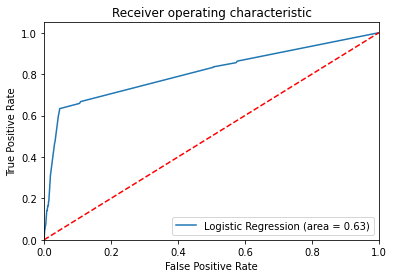

In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [166]:
input_features = [[1, 1, 0, 1, 1, 0, 0, 1]]

In [167]:
clf.predict(input_features)

array([1])

In [168]:
corona_prob = clf.predict_proba(input_features)
corona_prob

array([[0.05493907, 0.94506093]])